In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.3.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.1.0
h5py                3.8.0
ipykernel           6.16.0
ipython_genutils    0.2.0
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.2
mpl_toolkits        NA
natsort             8.2.0
nt                  NA
ntsecuritycon       NA
numba               0.56.4
numpy               1.23.3
packaging           21.3
pandas              1.5.1
parso               0.8.3
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.31
psutil              5.9.2
pure_eval           0.2.2
pydev_ipython       NA
pydevconsole        NA
pydevd   

In [4]:
python3-m pip install certifi

SyntaxError: invalid syntax (3353063534.py, line 1)

In [3]:
adata = sc.datasets.visium_sge(sample_id="Human_Breast_Cancer_Block_A_Section_1_10xvisium_deal.h5ad")
adata.var_names_make_unique()

HTTPError: HTTP Error 403: Forbidden

NameError: name 'adata' is not defined

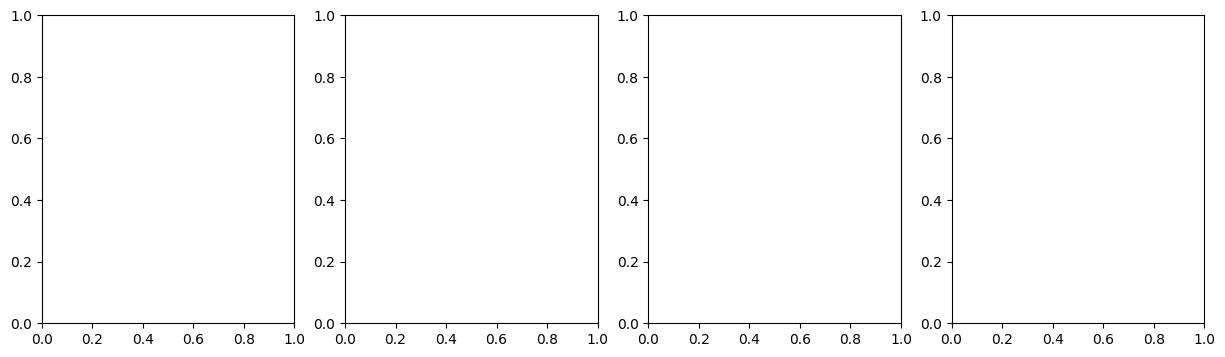

In [5]:
#  basic filtering
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [ ]:
# normalize data
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [ ]:
# embed and cluster the manifold encoded by transcriptional similarity
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

In [ ]:
#  covariates to check if there is any particular structure
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

In [ ]:
# spatial coordinates. overlay the circular spots on top
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

In [ ]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)

In [ ]:
# We can zoom in specific regions of interests
sc.pl.spatial(adata, 
              img_key="hires", 
              color="clusters", 
              groups=["0", "5"], 
              crop_coord=[1200, 1700, 1900, 1000], 
              alpha=0.5, 
              size=1.3)